In [1]:
from pathlib import Path
import numpy as np
import pandas as pd
import scanpy as sc
import os
import shutil

In [2]:
from stabox.model import STAMapper
import warnings
warnings.filterwarnings("ignore")

D:\Users\lqlu\work\software\Anaconda\envs\new_STABox_env\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
key_class1 = 'celltype'#celltype label for adata_sc, stored in adata_sc.obs[key_class1]
key_class2 = 'celltype'#celltype label for adata_sp, stoted in adata_sp.obs[key_class2]
key_classes = [key_class1, key_class2]

In [4]:
path = 'D:/Users/lqlu/work/Data/STABox_Data/MERFISH_hypothalamic/scRNA/hypothalamic_sc.h5ad'

In [5]:
adata_sc = sc.read_h5ad(r'D:/Users/lqlu/work/Data/STABox_Data/MERFISH_hypothalamic/scRNA/hypothalamic_sc.h5ad')
adata_sp = sc.read_h5ad(r'D:/Users/lqlu/work/Data/STABox_Data/MERFISH_hypothalamic/spatial/MERFISH_hypothalamic_15.h5ad') 

In [6]:
sc_name = 'hypothalamic_sc'
sp_name = 'hypothalamic_MERFISH'

#change dsnames for a new training task
dsnames = (sc_name, sp_name)

In [7]:
adata_sc

AnnData object with n_obs × n_vars = 30370 × 20320
    obs: 'celltype'
    var: 'gene_ids', 'n_cells'

In [8]:
adata_sp

AnnData object with n_obs × n_vars = 18586 × 161
    obs: 'Animal_ID', 'celltype'
    var: 'n_cells'
    obsm: 'spatial'

In [9]:
adatas = [adata_sc, adata_sp]

In [10]:
adatas

[AnnData object with n_obs × n_vars = 30370 × 20320
     obs: 'celltype'
     var: 'gene_ids', 'n_cells',
 AnnData object with n_obs × n_vars = 18586 × 161
     obs: 'Animal_ID', 'celltype'
     var: 'n_cells'
     obsm: 'spatial']

In [11]:
outputs = STAMapper.training(adatas=adatas, dsnames=dsnames, key_classes=key_classes)

Data Preprocessing!


RuntimeError: module compiled against API version 0xe but this version of numpy is 0xd

[leiden] Time used:  238.7358 s
a new directory made:
	_temp\('hypothalamic_sc', 'hypothalamic_MERFISH')\0\figs
already exists:
	_temp\('hypothalamic_sc', 'hypothalamic_MERFISH')\0
[*] Setting dataset names:
	0-->hypothalamic_sc
	1-->hypothalamic_MERFISH
[*] Setting aligned features for observation nodes (self._features)
[*] Setting observation-by-variable adjacent matrices (`self._ov_adjs`) for making merged graph adjacent matrix of observation and variable nodes
-------------------- Summary of the DGL-Heterograph --------------------
Graph(num_nodes={'cell': 48956, 'gene': 154},
      num_edges={('cell', 'express', 'gene'): 1451057, ('cell', 'self_loop_cell', 'cell'): 48956, ('cell', 'similar_to', 'cell'): 315368, ('gene', 'expressed_by', 'cell'): 1451057, ('gene', 'self_loop_gene', 'gene'): 154},
      metagraph=[('cell', 'gene', 'express'), ('cell', 'cell', 'self_loop_cell'), ('cell', 'cell', 'similar_to'), ('gene', 'cell', 'expressed_by'), ('gene', 'gene', 'self_loop_gene')])
self

100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:05<00:00,  1.01it/s]


object saved into:
	 _temp\('hypothalamic_sc', 'hypothalamic_MERFISH')\0\datapair_init.pickle


In [12]:
outputs

{'dpair': <stabox.model.datapair.aligned.AlignedDataPair at 0x1798f524cc8>,
 'trainer': <stabox.model.utils.train.Trainer at 0x1794661ce88>,
 'h_dict': {'cell': array([[-1.3756077e-02, -5.1566673e-04,  3.5953316e-01, ...,
          -1.1653878e-02, -8.9087216e-03, -1.3047754e-02],
         [-9.6051218e-03, -6.7022662e-03, -2.3182461e-02, ...,
           4.5088321e-02, -1.0245564e-02, -6.4837248e-03],
         [-2.3436758e-03, -7.4321195e-03, -2.3297055e-02, ...,
           8.1223398e-01, -2.4117432e-03, -2.4381238e-03],
         ...,
         [-4.7524418e-03, -7.3490823e-03, -2.3220209e-02, ...,
           8.2838577e-01, -2.6111864e-03, -2.8257039e-03],
         [-4.3832357e-03, -4.2073946e-03, -2.0481188e-02, ...,
           8.3832955e-01, -2.0729217e-03, -3.1470042e-03],
         [-5.2634100e-03,  2.2954460e-02,  1.0832604e+00, ...,
           2.4103424e-02,  3.7686938e-01, -4.4135987e-03]], dtype=float32),
  'gene': array([[-0.02384941, -0.01294153, -0.00618644, ..., -0.01319207,
   

In [13]:
# if os.path.exists(Path(".") /'_temp' / f'{dsnames}'):
#     shutil.rmtree(Path(".") /'_temp' / f'{dsnames}')

In [15]:
from stabox.model import pp, pl

In [16]:
folder_path = Path(".") /'_temp' / f'{dsnames}'
best_model, accuracy, macrof1, weightedf1 = pp.calc_scores(folder_path, key_class2)
print(f"Best Model: {best_model}, Accuracy: {accuracy:.3f}, Macro F1 Score: {macrof1:.3f}, Weighted F1 Score: {weightedf1:.3f}")

Best Model: 0, Accuracy: 0.859, Macro F1 Score: 0.573, Weighted F1 Score: 0.861


In [17]:
obs = pd.read_csv(folder_path/f'{best_model}'/'obs.csv',index_col=0)
obs = obs[obs['dataset'].isin([sp_name])]
adata_sp.obs['predicted'] = list(obs['predicted'])

In [18]:
sc.pp.normalize_total(adata_sp, target_sum=1e4)
sc.pp.log1p(adata_sp)
adata_sp.raw = adata_sp
#sc.pp.scale(adata_sp, max_value=10)#optional
sc.tl.pca(adata_sp, svd_solver="arpack")
sc.pp.neighbors(adata_sp, n_neighbors=10, n_pcs=40)
sc.tl.umap(adata_sp)

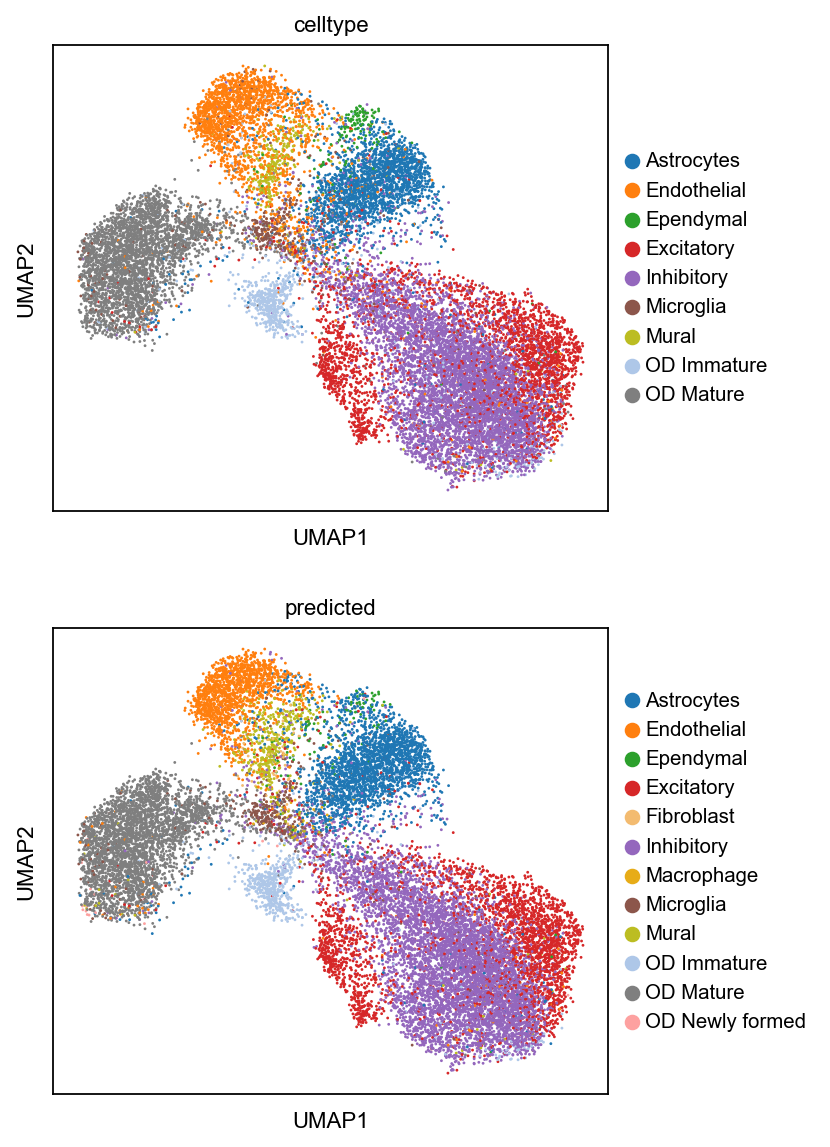

In [19]:
palette = {'Astrocytes': '#1f77b4',
 'Inhibitory': '#9467bd',
 'Endothelial': '#ff7f0e',
 'Ependymal': '#2ca02c',
 'Excitatory': '#d62728',
 'Fibroblast': '#f3bb70',
 'Macrophage': '#e7ac18',
 'Microglia': '#8c564b',
 'Mural': '#bcbd22',
 'OD Immature': '#aec7e8',
 'OD Mature': '#7f7f7f',
 'OD Newly formed': '#fda1a0'}

sc.pl.umap(adata_sp, color=["celltype", "predicted"], ncols=1, palette=palette)